In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Srilanka_2020

In [5]:
Srilanka_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
60,60,DM de Silva (SL),3,3,0,81,51,27.00,81,100.00,...,29,0,-,-,3.62,-,0,0,1,0
61,61,PWH de Silva (SL),3,3,1,75,42*,37.50,58,129.31,...,118,4,3/30,29.50,3.93,45.0,0,0,0,0
70,70,N Pradeep (SL),3,2,2,0,0*,-,0,-,...,101,3,2/37,33.66,4.92,41.0,0,0,0,0
71,71,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,...,-,-,-,-,-,-,-,-,0,0
107,107,FDM Karunaratne (SL),3,3,0,97,52,32.33,119,81.51,...,-,-,-,-,-,-,-,-,2,0
134,134,AD Mathews (SL),3,3,0,18,12,6.00,23,78.26,...,96,5,4/59,19.20,5.33,21.6,1,0,1,0
140,140,BKG Mendis (SL),3,3,0,194,119,64.66,192,101.04,...,-,-,-,-,-,-,-,-,3,0
178,178,MDKJ Perera (SL),3,3,0,86,44,28.66,106,81.13,...,-,-,-,-,-,-,-,-,0,0
179,179,NLTC Perera (SL),3,3,0,106,38,35.33,78,135.89,...,112,1,1/40,112.00,5.74,117.0,0,0,1,0
196,196,PADLR Sandakan (SL),3,2,0,3,3,1.50,10,30.00,...,130,3,3/57,43.33,6.78,38.3,0,0,1,0


In [6]:
Srilanka_2020=Srilanka_2020.reset_index()

In [7]:
Srilanka_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,60,60,DM de Silva (SL),3,3,0,81,51,27.00,81,...,29,0,-,-,3.62,-,0,0,1,0
1,61,61,PWH de Silva (SL),3,3,1,75,42*,37.50,58,...,118,4,3/30,29.50,3.93,45.0,0,0,0,0
2,70,70,N Pradeep (SL),3,2,2,0,0*,-,0,...,101,3,2/37,33.66,4.92,41.0,0,0,0,0
3,71,71,WIA Fernando (SL),3,3,0,206,127,68.66,212,...,-,-,-,-,-,-,-,-,0,0
4,107,107,FDM Karunaratne (SL),3,3,0,97,52,32.33,119,...,-,-,-,-,-,-,-,-,2,0
5,134,134,AD Mathews (SL),3,3,0,18,12,6.00,23,...,96,5,4/59,19.20,5.33,21.6,1,0,1,0
6,140,140,BKG Mendis (SL),3,3,0,194,119,64.66,192,...,-,-,-,-,-,-,-,-,3,0
7,178,178,MDKJ Perera (SL),3,3,0,86,44,28.66,106,...,-,-,-,-,-,-,-,-,0,0
8,179,179,NLTC Perera (SL),3,3,0,106,38,35.33,78,...,112,1,1/40,112.00,5.74,117.0,0,0,1,0
9,196,196,PADLR Sandakan (SL),3,2,0,3,3,1.50,10,...,130,3,3/57,43.33,6.78,38.3,0,0,1,0


In [8]:
Srilanka_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Srilanka_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,DM de Silva (SL),3,3,0,81,51,27.00,81,100.00,0,...,29,0,-,-,3.62,-,0,0,1,0
1,PWH de Silva (SL),3,3,1,75,42*,37.50,58,129.31,0,...,118,4,3/30,29.50,3.93,45.0,0,0,0,0
2,N Pradeep (SL),3,2,2,0,0*,-,0,-,0,...,101,3,2/37,33.66,4.92,41.0,0,0,0,0
3,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,-,0,0
4,FDM Karunaratne (SL),3,3,0,97,52,32.33,119,81.51,0,...,-,-,-,-,-,-,-,-,2,0
5,AD Mathews (SL),3,3,0,18,12,6.00,23,78.26,0,...,96,5,4/59,19.20,5.33,21.6,1,0,1,0
6,BKG Mendis (SL),3,3,0,194,119,64.66,192,101.04,1,...,-,-,-,-,-,-,-,-,3,0
7,MDKJ Perera (SL),3,3,0,86,44,28.66,106,81.13,0,...,-,-,-,-,-,-,-,-,0,0
8,NLTC Perera (SL),3,3,0,106,38,35.33,78,135.89,0,...,112,1,1/40,112.00,5.74,117.0,0,0,1,0
9,PADLR Sandakan (SL),3,2,0,3,3,1.50,10,30.00,0,...,130,3,3/57,43.33,6.78,38.3,0,0,1,0


In [10]:
Srilanka_2020_players =Srilanka_2020.copy()

In [11]:
Srilanka_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
Srilanka_2020_players.HS=Srilanka_2020_players.HS.str.extract('(\d+)')
Srilanka_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
Srilanka_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,3,0,81,51,27.00,81,100.00,0,1,...,29,0,-,-,3.62,-,0,0,1,0
1,3,3,1,75,42,37.50,58,129.31,0,0,...,118,4,3/30,29.50,3.93,45.0,0,0,0,0
2,3,2,2,0,0,-,0,-,0,0,...,101,3,2/37,33.66,4.92,41.0,0,0,0,0
3,3,3,0,206,127,68.66,212,97.16,1,1,...,-,-,-,-,-,-,-,-,0,0
4,3,3,0,97,52,32.33,119,81.51,0,1,...,-,-,-,-,-,-,-,-,2,0
5,3,3,0,18,12,6.00,23,78.26,0,0,...,96,5,4/59,19.20,5.33,21.6,1,0,1,0
6,3,3,0,194,119,64.66,192,101.04,1,1,...,-,-,-,-,-,-,-,-,3,0
7,3,3,0,86,44,28.66,106,81.13,0,0,...,-,-,-,-,-,-,-,-,0,0
8,3,3,0,106,38,35.33,78,135.89,0,0,...,112,1,1/40,112.00,5.74,117.0,0,0,1,0
9,3,2,0,3,3,1.50,10,30.00,0,0,...,130,3,3/57,43.33,6.78,38.3,0,0,1,0


In [14]:
Srilanka_2020_players.replace("-",0,inplace=True)

In [15]:
Srilanka_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Srilanka_2020_players_scaled = pd.DataFrame(scaler.fit_transform(Srilanka_2020_players),columns=Srilanka_2020_players.columns)
Srilanka_2020_players_scaled.shape
Srilanka_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.0,0.471405,-0.565685,0.008107,0.125861,-0.057629,-0.009355,0.398336,-0.471405,1.322876,...,-0.565685,-0.652566,-0.957826,-0.792599,0.066692,-0.805992,-0.316228,0.0,0.101015,0.0
1,0.0,0.471405,0.989949,-0.081074,-0.096644,0.413104,-0.347489,1.173398,-0.471405,-0.755929,...,2.545584,0.779860,1.149392,0.118031,0.177629,0.528789,-0.316228,0.0,-1.010153,0.0
2,0.0,-2.121320,2.545584,-1.195839,-1.135001,-1.268085,-1.200174,-2.246021,-0.471405,-0.755929,...,0.989949,0.506251,0.622587,0.246445,0.531910,0.410142,-0.316228,0.0,-1.010153,0.0
3,0.0,0.471405,-0.565685,1.866049,2.004793,1.810060,1.916537,0.323237,2.121320,1.322876,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
4,0.0,0.471405,-0.565685,0.245924,0.150584,0.181324,0.549300,-0.090605,-0.471405,1.322876,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,1.212183,0.0


In [17]:
Srilanka_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,11.0,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01,...,1.100000e+01,1.100000e+01,11.000000,1.100000e+01,1.100000e+01,1.100000e+01,11.000000,11.0,1.100000e+01,11.0
mean,0.0,-4.289498e-16,-1.009294e-16,2.018587e-17,4.037175e-17,2.725093e-16,-3.027881e-17,-3.532528e-17,-4.037175e-17,-2.018587e-17,...,-1.413011e-16,2.018587e-17,0.000000,1.009294e-16,-2.018587e-16,-3.532528e-17,0.000000,0.0,4.289498e-17,0.0
std,0.0,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,1.048809e+00,...,1.048809e+00,1.048809e+00,1.048809,1.048809e+00,1.048809e+00,1.048809e+00,1.048809,0.0,1.048809e+00,0.0
min,0.0,-2.121320e+00,-5.656854e-01,-1.195839e+00,-1.135001e+00,-1.268085e+00,-1.200174e+00,-2.246021e+00,-4.714045e-01,-7.559289e-01,...,-5.656854e-01,-1.119311e+00,-0.957826,-7.925989e-01,-1.228761e+00,-8.059921e-01,-0.316228,0.0,-1.010153e+00,0.0
25%,0.0,4.714045e-01,-5.656854e-01,-9.208635e-01,-7.765202e-01,-9.206395e-01,-8.914436e-01,-1.386004e-01,-4.714045e-01,-7.559289e-01,...,-5.656854e-01,-1.119311e+00,-0.957826,-7.925989e-01,-1.228761e+00,-8.059921e-01,-0.316228,0.0,-1.010153e+00,0.0
50%,0.0,4.714045e-01,-5.656854e-01,8.107383e-03,-9.664361e-02,1.679151e-02,-5.345989e-02,3.232366e-01,-4.714045e-01,-7.559289e-01,...,-5.656854e-01,4.257773e-01,-0.431022,-1.999177e-01,1.776287e-01,-1.652971e-01,-0.316228,0.0,1.010153e-01,0.0
75%,0.0,4.714045e-01,2.121320e-01,3.128098e-01,1.382228e-01,3.644614e-01,4.537408e-01,4.120871e-01,-4.714045e-01,1.322876e+00,...,2.121320e-01,7.315761e-01,0.885989,3.956961e-01,7.519942e-01,3.700984e-01,-0.316228,0.0,1.010153e-01,0.0
max,0.0,4.714045e-01,2.545584e+00,1.866049e+00,2.004793e+00,1.810060e+00,1.916537e+00,1.347396e+00,2.121320e+00,1.322876e+00,...,2.545584e+00,1.761635e+00,1.676196,2.664708e+00,1.437296e+00,2.664439e+00,3.162278,0.0,2.323351e+00,0.0


In [18]:
X =  Srilanka_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.        ,  0.47140452, -0.56568542,  0.00810738,  0.12586145,
        -0.05762912, -0.00935548,  0.3983364 , -0.47140452,  1.32287566,
        -0.61237244,  0.1206777 , -0.69748583, -1.19907005,  0.        ,
         0.12964074, -0.42988336, -0.56568542, -0.65256586, -0.95782629,
        -0.79259895,  0.06669211, -0.80599206, -0.31622777,  0.        ,
         0.10101525,  0.        ],
       [ 0.        ,  0.47140452,  0.98994949, -0.08107383, -0.09664361,
         0.4131038 , -0.34748926,  1.17339759, -0.47140452, -0.75592895,
        -0.61237244, -0.02681727,  1.85996222, -1.18198486,  0.        ,
         0.84266484,  1.6220254 ,  2.54558441,  0.77986009,  1.14939154,
         0.11803113,  0.17762874,  0.52878903, -0.31622777,  0.        ,
        -1.01015254,  0.        ],
       [ 0.        , -2.12132034,  2.54558441, -1.19583895, -1.13500056,
        -1.26808521, -1.20017444, -2.24602112, -0.47140452, -0.75592895,
        -0.61237244, -1.20677698, -0.69748583, -1.0282

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Srilanka_2020_players_scaled))

False

In [23]:
Srilanka_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.0,0.471405,-0.565685,0.008107,0.125861,-0.057629,-0.009355,0.398336,-0.471405,1.322876,...,-0.565685,-0.652566,-0.957826,-0.792599,0.066692,-0.805992,-0.316228,0.0,0.101015,0.0
1,0.0,0.471405,0.989949,-0.081074,-0.096644,0.413104,-0.347489,1.173398,-0.471405,-0.755929,...,2.545584,0.779860,1.149392,0.118031,0.177629,0.528789,-0.316228,0.0,-1.010153,0.0
2,0.0,-2.121320,2.545584,-1.195839,-1.135001,-1.268085,-1.200174,-2.246021,-0.471405,-0.755929,...,0.989949,0.506251,0.622587,0.246445,0.531910,0.410142,-0.316228,0.0,-1.010153,0.0
3,0.0,0.471405,-0.565685,1.866049,2.004793,1.810060,1.916537,0.323237,2.121320,1.322876,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
4,0.0,0.471405,-0.565685,0.245924,0.150584,0.181324,0.549300,-0.090605,-0.471405,1.322876,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,1.212183,0.0
5,0.0,0.471405,-0.565685,-0.928295,-0.838327,-0.999095,-0.862041,-0.176547,-0.471405,-0.755929,...,-0.565685,0.425777,1.676196,-0.199918,0.678633,-0.165297,3.162278,0.0,0.101015,0.0
6,0.0,0.471405,-0.565685,1.687687,1.807011,1.630733,1.622508,0.425838,2.121320,1.322876,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,2.323351,0.0
7,0.0,0.471405,-0.565685,0.082425,-0.047198,0.016792,0.358181,-0.100654,-0.471405,-0.755929,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
8,0.0,0.471405,-0.565685,0.379696,-0.195535,0.315819,-0.053460,1.347396,-0.471405,-0.755929,...,0.989949,0.683292,-0.431022,2.664708,0.825356,2.664439,-0.316228,0.0,0.101015,0.0
9,0.0,-2.121320,-0.565685,-1.151248,-1.060832,-1.200838,-1.053160,-1.452714,-0.471405,-0.755929,...,-0.565685,0.972996,0.622587,0.544947,1.197530,0.330055,-0.316228,0.0,0.101015,0.0


In [24]:
np.all(np.isfinite(Srilanka_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


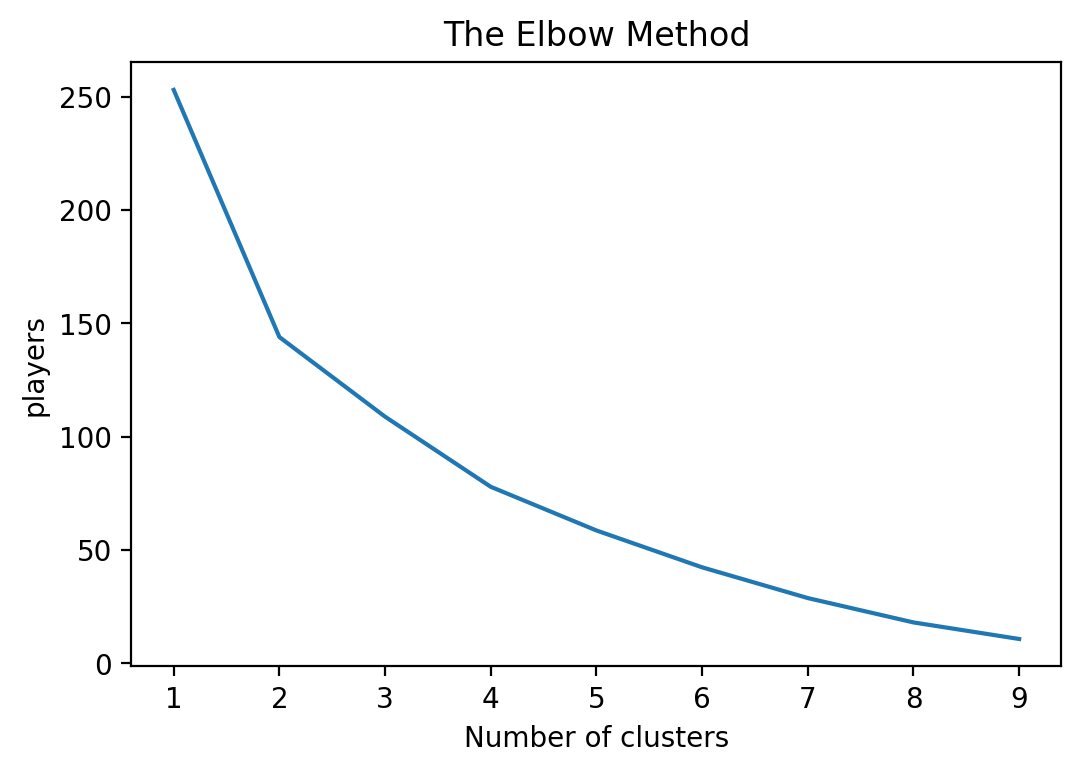

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[ 0.        ,  0.47140452,  0.21213203,  0.14931096, -0.14608918,
         0.3644614 , -0.20047457,  1.26039695, -0.47140452, -0.75592895,
        -0.61237244,  0.04693022,  1.22060021, -0.17395835,  0.        ,
         0.84266484,  1.12303849,  1.76776695,  0.73157607,  0.35918486,
         1.39136979,  0.50149213,  1.59661391, -0.31622777,  0.        ,
        -0.45456865,  0.        ],
       [ 0.        , -0.82495791,  0.60104076, -1.0472036 , -0.93721828,
        -1.07755045, -1.00905535, -0.86923638, -0.47140452, -0.75592895,
         0.51031036, -1.05928202, -0.69748583,  0.49236426,  0.        ,
         0.84266484,  0.7219836 , -0.1767767 ,  0.91666482,  1.01769043,
         0.29506379,  0.96134235,  0.20918312,  0.55339859,  0.        ,
        -0.1767767 ,  0.        ],
       [ 0.        ,  0.47140452, -0.56568542,  0.77803849,  0.8082103 ,
         0.7162558 ,  0.88743411,  0.19123032,  0.56568542,  0.90711474,
        -0.16329932,  0.82865353,  0.06974858, -0.3243

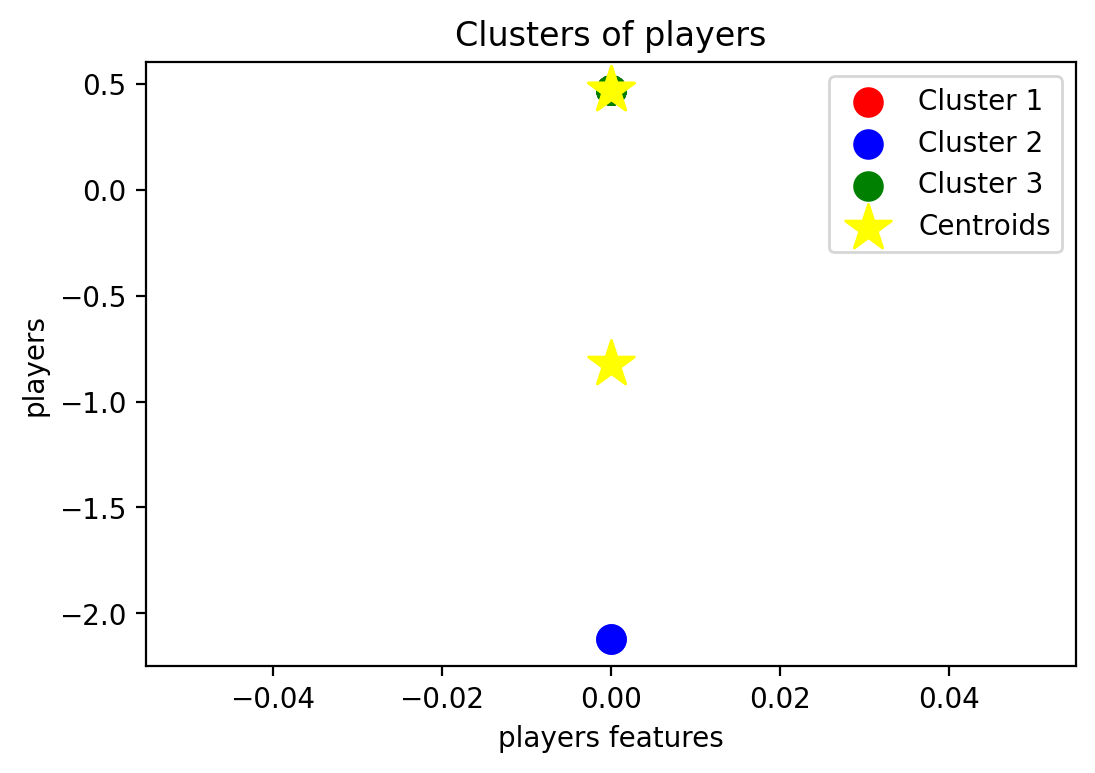

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Srilanka_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,DM de Silva (SL),3,3,0,81,51,27.00,81,100.00,0,...,29,0,-,-,3.62,-,0,0,1,0
1,PWH de Silva (SL),3,3,1,75,42*,37.50,58,129.31,0,...,118,4,3/30,29.50,3.93,45.0,0,0,0,0
2,N Pradeep (SL),3,2,2,0,0*,-,0,-,0,...,101,3,2/37,33.66,4.92,41.0,0,0,0,0
3,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,-,0,0
4,FDM Karunaratne (SL),3,3,0,97,52,32.33,119,81.51,0,...,-,-,-,-,-,-,-,-,2,0
5,AD Mathews (SL),3,3,0,18,12,6.00,23,78.26,0,...,96,5,4/59,19.20,5.33,21.6,1,0,1,0
6,BKG Mendis (SL),3,3,0,194,119,64.66,192,101.04,1,...,-,-,-,-,-,-,-,-,3,0
7,MDKJ Perera (SL),3,3,0,86,44,28.66,106,81.13,0,...,-,-,-,-,-,-,-,-,0,0
8,NLTC Perera (SL),3,3,0,106,38,35.33,78,135.89,0,...,112,1,1/40,112.00,5.74,117.0,0,0,1,0
9,PADLR Sandakan (SL),3,2,0,3,3,1.50,10,30.00,0,...,130,3,3/57,43.33,6.78,38.3,0,0,1,0


In [31]:
Srilanka_2020["cluster"] = y_kmeans

In [32]:
Srilanka_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,DM de Silva (SL),3,3,0,81,51,27.00,81,100.00,0,...,0,-,-,3.62,-,0,0,1,0,2
1,PWH de Silva (SL),3,3,1,75,42*,37.50,58,129.31,0,...,4,3/30,29.50,3.93,45.0,0,0,0,0,0
2,N Pradeep (SL),3,2,2,0,0*,-,0,-,0,...,3,2/37,33.66,4.92,41.0,0,0,0,0,1
3,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,0,0,2
4,FDM Karunaratne (SL),3,3,0,97,52,32.33,119,81.51,0,...,-,-,-,-,-,-,-,2,0,2
5,AD Mathews (SL),3,3,0,18,12,6.00,23,78.26,0,...,5,4/59,19.20,5.33,21.6,1,0,1,0,1
6,BKG Mendis (SL),3,3,0,194,119,64.66,192,101.04,1,...,-,-,-,-,-,-,-,3,0,2
7,MDKJ Perera (SL),3,3,0,86,44,28.66,106,81.13,0,...,-,-,-,-,-,-,-,0,0,2
8,NLTC Perera (SL),3,3,0,106,38,35.33,78,135.89,0,...,1,1/40,112.00,5.74,117.0,0,0,1,0,0
9,PADLR Sandakan (SL),3,2,0,3,3,1.50,10,30.00,0,...,3,3/57,43.33,6.78,38.3,0,0,1,0,1


In [33]:
Srilanka_2020['cluster'].value_counts()

2    5
1    4
0    2
Name: cluster, dtype: int64

In [34]:
SL_Cluster_2020 = np.array([2,4,5])

In [35]:
SL_Cluster_2020

array([2, 4, 5])

In [36]:
%store SL_Cluster_2020

Stored 'SL_Cluster_2020' (ndarray)


In [37]:
Srilanka_2020_players_scaled.insert(0, 'Player', Srilanka_2020.Player)

In [38]:
Srilanka_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,DM de Silva (SL),0.0,0.471405,-0.565685,0.008107,0.125861,-0.057629,-0.009355,0.398336,-0.471405,...,-0.565685,-0.652566,-0.957826,-0.792599,0.066692,-0.805992,-0.316228,0.0,0.101015,0.0
1,PWH de Silva (SL),0.0,0.471405,0.989949,-0.081074,-0.096644,0.413104,-0.347489,1.173398,-0.471405,...,2.545584,0.779860,1.149392,0.118031,0.177629,0.528789,-0.316228,0.0,-1.010153,0.0
2,N Pradeep (SL),0.0,-2.121320,2.545584,-1.195839,-1.135001,-1.268085,-1.200174,-2.246021,-0.471405,...,0.989949,0.506251,0.622587,0.246445,0.531910,0.410142,-0.316228,0.0,-1.010153,0.0
3,WIA Fernando (SL),0.0,0.471405,-0.565685,1.866049,2.004793,1.810060,1.916537,0.323237,2.121320,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
4,FDM Karunaratne (SL),0.0,0.471405,-0.565685,0.245924,0.150584,0.181324,0.549300,-0.090605,-0.471405,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,1.212183,0.0
5,AD Mathews (SL),0.0,0.471405,-0.565685,-0.928295,-0.838327,-0.999095,-0.862041,-0.176547,-0.471405,...,-0.565685,0.425777,1.676196,-0.199918,0.678633,-0.165297,3.162278,0.0,0.101015,0.0
6,BKG Mendis (SL),0.0,0.471405,-0.565685,1.687687,1.807011,1.630733,1.622508,0.425838,2.121320,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,2.323351,0.0
7,MDKJ Perera (SL),0.0,0.471405,-0.565685,0.082425,-0.047198,0.016792,0.358181,-0.100654,-0.471405,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
8,NLTC Perera (SL),0.0,0.471405,-0.565685,0.379696,-0.195535,0.315819,-0.053460,1.347396,-0.471405,...,0.989949,0.683292,-0.431022,2.664708,0.825356,2.664439,-0.316228,0.0,0.101015,0.0
9,PADLR Sandakan (SL),0.0,-2.121320,-0.565685,-1.151248,-1.060832,-1.200838,-1.053160,-1.452714,-0.471405,...,-0.565685,0.972996,0.622587,0.544947,1.197530,0.330055,-0.316228,0.0,0.101015,0.0


In [39]:
Srilanka_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,DM de Silva (SL),0.0,0.471405,-0.565685,0.008107,0.125861,-0.057629,-0.009355,0.398336,-0.471405,...,-0.565685,-0.652566,-0.957826,-0.792599,0.066692,-0.805992,-0.316228,0.0,0.101015,0.0
1,PWH de Silva (SL),0.0,0.471405,0.989949,-0.081074,-0.096644,0.413104,-0.347489,1.173398,-0.471405,...,2.545584,0.779860,1.149392,0.118031,0.177629,0.528789,-0.316228,0.0,-1.010153,0.0
2,N Pradeep (SL),0.0,-2.121320,2.545584,-1.195839,-1.135001,-1.268085,-1.200174,-2.246021,-0.471405,...,0.989949,0.506251,0.622587,0.246445,0.531910,0.410142,-0.316228,0.0,-1.010153,0.0
3,WIA Fernando (SL),0.0,0.471405,-0.565685,1.866049,2.004793,1.810060,1.916537,0.323237,2.121320,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
4,FDM Karunaratne (SL),0.0,0.471405,-0.565685,0.245924,0.150584,0.181324,0.549300,-0.090605,-0.471405,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,1.212183,0.0
5,AD Mathews (SL),0.0,0.471405,-0.565685,-0.928295,-0.838327,-0.999095,-0.862041,-0.176547,-0.471405,...,-0.565685,0.425777,1.676196,-0.199918,0.678633,-0.165297,3.162278,0.0,0.101015,0.0
6,BKG Mendis (SL),0.0,0.471405,-0.565685,1.687687,1.807011,1.630733,1.622508,0.425838,2.121320,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,2.323351,0.0
7,MDKJ Perera (SL),0.0,0.471405,-0.565685,0.082425,-0.047198,0.016792,0.358181,-0.100654,-0.471405,...,-0.565685,-1.119311,-0.957826,-0.792599,-1.228761,-0.805992,-0.316228,0.0,-1.010153,0.0
8,NLTC Perera (SL),0.0,0.471405,-0.565685,0.379696,-0.195535,0.315819,-0.053460,1.347396,-0.471405,...,0.989949,0.683292,-0.431022,2.664708,0.825356,2.664439,-0.316228,0.0,0.101015,0.0
9,PADLR Sandakan (SL),0.0,-2.121320,-0.565685,-1.151248,-1.060832,-1.200838,-1.053160,-1.452714,-0.471405,...,-0.565685,0.972996,0.622587,0.544947,1.197530,0.330055,-0.316228,0.0,0.101015,0.0


In [40]:
Srilanka_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,DM de Silva (SL),-0.057629,-0.792599
1,PWH de Silva (SL),0.413104,0.118031
2,N Pradeep (SL),-1.268085,0.246445
3,WIA Fernando (SL),1.810060,-0.792599
4,FDM Karunaratne (SL),0.181324,-0.792599
5,AD Mathews (SL),-0.999095,-0.199918
6,BKG Mendis (SL),1.630733,-0.792599
7,MDKJ Perera (SL),0.016792,-0.792599
8,NLTC Perera (SL),0.315819,2.664708
9,PADLR Sandakan (SL),-1.200838,0.544947


In [41]:
SL_2020_Ave=Srilanka_2020_players_scaled.mean()

In [42]:
SL_2020_Ave

Mat_x           0.000000e+00
Inns_x         -4.289498e-16
NO             -1.009294e-16
Runs_x          2.018587e-17
HS              4.037175e-17
Ave_x           2.725093e-16
BF             -3.027881e-17
SR_x           -3.532528e-17
100            -4.037175e-17
50             -2.018587e-17
0               0.000000e+00
4s              3.027881e-17
6s              6.055762e-17
Unnamed: 0_y   -1.009294e-16
Mat_y           0.000000e+00
Inns_y          6.055762e-17
Overs           1.614870e-16
Mdns           -1.413011e-16
Runs_y          2.018587e-17
Wkts            0.000000e+00
Ave_y           1.009294e-16
Econ           -2.018587e-16
SR_y           -3.532528e-17
4               0.000000e+00
5               0.000000e+00
Ct              4.289498e-17
St              0.000000e+00
dtype: float64

In [43]:
SL_Ave_2020 =SL_2020_Ave[['Ave_x','Ave_y']]

In [44]:
SL_Ave_2020

Ave_x    2.725093e-16
Ave_y    1.009294e-16
dtype: float64

In [45]:
SL_Ave_2020 = np.array([SL_Ave_2020.Ave_x, SL_Ave_2020.Ave_y])

In [46]:
SL_Ave_2020

array([2.72509288e-16, 1.00929366e-16])

In [47]:
%store SL_Ave_2020

Stored 'SL_Ave_2020' (ndarray)


In [48]:
Srilanka_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,DM de Silva (SL),3,3,0,81,51,27.00,81,100.00,0,...,0,-,-,3.62,-,0,0,1,0,2
1,PWH de Silva (SL),3,3,1,75,42*,37.50,58,129.31,0,...,4,3/30,29.50,3.93,45.0,0,0,0,0,0
2,N Pradeep (SL),3,2,2,0,0*,-,0,-,0,...,3,2/37,33.66,4.92,41.0,0,0,0,0,1
3,WIA Fernando (SL),3,3,0,206,127,68.66,212,97.16,1,...,-,-,-,-,-,-,-,0,0,2
4,FDM Karunaratne (SL),3,3,0,97,52,32.33,119,81.51,0,...,-,-,-,-,-,-,-,2,0,2
5,AD Mathews (SL),3,3,0,18,12,6.00,23,78.26,0,...,5,4/59,19.20,5.33,21.6,1,0,1,0,1
6,BKG Mendis (SL),3,3,0,194,119,64.66,192,101.04,1,...,-,-,-,-,-,-,-,3,0,2
7,MDKJ Perera (SL),3,3,0,86,44,28.66,106,81.13,0,...,-,-,-,-,-,-,-,0,0,2
8,NLTC Perera (SL),3,3,0,106,38,35.33,78,135.89,0,...,1,1/40,112.00,5.74,117.0,0,0,1,0,0
9,PADLR Sandakan (SL),3,2,0,3,3,1.50,10,30.00,0,...,3,3/57,43.33,6.78,38.3,0,0,1,0,1
